In [1]:
#Paquetes para obtener información de una URL (URIParser), Visualizador (VegaLite)
#using Pkg
#Pkg.add(["URIParser", "VegaLite"])
using URIParser, VegaLite

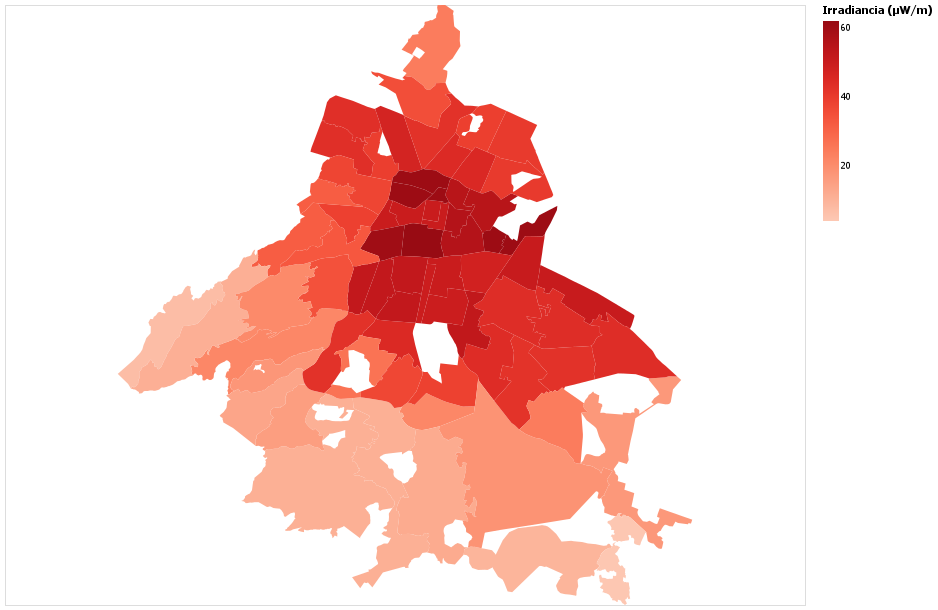

In [4]:
cdmxirr = URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/irradianciasector.csv")
@vlplot(width=800, height=600) + 
@vlplot(
    mark={ 
        :geoshape    
    },
    data={
        url=URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/sectorescdmx.json"),
        format={
            typ=:topojson,
            feature=:"OGRGeoJSON"
        }     
    
    },
    transform=[{
        lookup="properties.sector",
        from={
            data={
                url=cdmxirr,
                format={
                    typ=:csv
                }
            },
            key=:Sectores,
            fields=["Irradiancia"]
        }
    }],
    color={
        "Irradiancia:q",
        scale={domain=[4, 62], scheme=:reds},
        legend={title="Irradiancia (µW/m)"}
    },
    projection={
        typ=:albers
    }
)

In [7]:
using PlotShapefiles
cdmx = open_shapefile("alcaldias.shp")

┌ Info: Precompiling PlotShapefiles [297584a0-97f5-11e9-2762-9b6638c511aa]
└ @ Base loading.jl:1260


Shapefile.Handle{Union{Missing, Shapefile.Polygon}}(9994, 117794, 1000, 5, Shapefile.Rect(-99.36492419999993, 19.048236659999116, -98.9403028149999, 19.592757279999127), Shapefile.Interval(0.0, 0.0), Shapefile.Interval(0.0, 0.0), Union{Missing, Shapefile.Polygon}[Polygon(469 Points), Polygon(382 Points), Polygon(897 Points), Polygon(386 Points), Polygon(602 Points), Polygon(1931 Points), Polygon(1300 Points), Polygon(481 Points), Polygon(1897 Points), Polygon(1338 Points), Polygon(435 Points), Polygon(1168 Points), Polygon(686 Points), Polygon(789 Points), Polygon(1298 Points), Polygon(603 Points)])

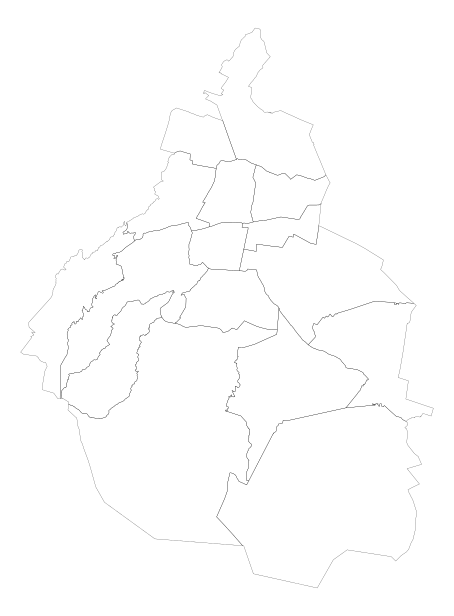

In [29]:
using Plots
using StatsPlots

plotshape(cdmx)